# Step 1: Data Reading and Understanding
### we will start by loading the dataset and defining the paths for the "Train" and "Test" images.

In [9]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [10]:
train_dir = "C:\\Users\\rashmi.bharti\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train"
test_dir = "C:\\Users\\rashmi.bharti\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test"

In [11]:
# Specify image dimensions and batch size
img_height = 180
img_width = 180
batch_size = 32

# Step 2: Dataset Creation
####  We will create a train and validation dataset using ImageDataGenerator to load the images from directories and rescale the images to a range between 0 and 1. Make sure we resize images to 180x180 pixels.

In [12]:
# ImageDataGenerator for Training and Validation with rescaling
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)  # 20% for validation

# Training dataset
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Validation dataset
validation_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1795 images belonging to 9 classes.
Found 444 images belonging to 9 classes.


# Step 3: Dataset Visualization
#### Visualizing one sample from each class in the dataset. we can display a batch of images and their labels to ensure everything is loaded correctly.

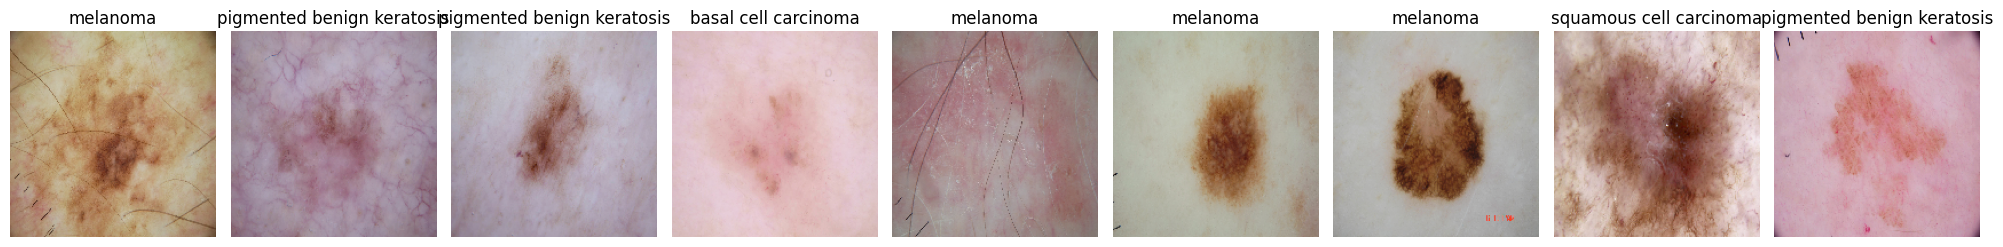

In [13]:
# Visualize a batch of training images with their labels
class_names = list(train_data.class_indices.keys())

def plot_images(images_arr, labels):
    fig, axes = plt.subplots(1, 9, figsize=(20, 20))
    axes = axes.flatten()
    for img, label, ax in zip(images_arr, labels, axes):
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(class_names[label])
    plt.tight_layout()
    plt.show()

# Getting a batch of images from the training dataset
images, labels = next(train_data)

# Plot 9 images
plot_images(images[:9], labels[:9].argmax(axis=1))

# Step 4: Model Building & Training
#### Next, we'll create a basic CNN model. The model will normalize the images by rescaling them between 0 and 1, and use an appropriate optimizer and loss function.

In [14]:
from tensorflow.keras import layers, models

# Build the CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(9, activation='softmax')  # 9 output classes
    ])
    
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Instantiate the model
model = create_model()

# Model summary
model.summary()

# Train the model for 20 epochs
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=20
)


C:\Users\rashmi.bharti\AppData\Local\Programs\Python\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 87, 87, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 43, 43, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 41, 41, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 20, 20, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 51200)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       6,553,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,648,137 (25.36 MB)

 Trainable params: 6,648,137 (25.36 MB)

 Non-trainable params: 0 (0.00 B)

C:\Users\rashmi.bharti\AppData\Local\Programs\Python\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 101s 2s/step - accuracy: 0.2100 - loss: 2.2043 - val_accuracy: 0.2455 - val_loss: 1.9754
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 65s 1s/step - accuracy: 0.3574 - loss: 1.8181 - val_accuracy: 0.4369 - val_loss: 1.7978
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 72s 1s/step - accuracy: 0.5075 - loss: 1.4366 - val_accuracy: 0.4144 - val_loss: 1.6755
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.4742 - loss: 1.5128 - val_accuracy: 0.3784 - val_loss: 1.9107
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 73s 1s/step - accuracy: 0.5361 - loss: 1.3197 - val_accuracy: 0.4189 - val_loss: 1.6701
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 76s 1s/step - accuracy: 0.5444 - loss: 1.2570 - val_accuracy: 0.4640 - val_loss: 1.6850
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.5496 - loss: 1.2385 - val_accuracy: 0.4167 - val_loss: 1.9622
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 74s 1s/step - accuracy: 0.6106 - loss: 1.0845 - val_accuracy: 0.4054 - val_loss

# Step 5: Data Augmentation
#### To reduce overfitting or underfitting, we can augment the dataset by applying transformations such as rotation, flipping, etc.

In [15]:
# Data Augmentation: apply transformations to increase model robustness
train_datagen_augmented = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Training dataset with augmentation
train_data_augmented = train_datagen_augmented.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

# Model retraining with data augmentation
history_augmented = model.fit(
    train_data_augmented,
    validation_data=validation_data,
    epochs=20
)


Found 1795 images belonging to 9 classes.
Epoch 1/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.4514 - loss: 1.8080 - val_accuracy: 0.4797 - val_loss: 1.6458
Epoch 2/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.5224 - loss: 1.3184 - val_accuracy: 0.4482 - val_loss: 1.6421
Epoch 3/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5141 - loss: 1.3480 - val_accuracy: 0.4640 - val_loss: 1.6357
Epoch 4/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5381 - loss: 1.2569 - val_accuracy: 0.4550 - val_loss: 1.8288
Epoch 5/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5303 - loss: 1.2979 - val_accuracy: 0.4842 - val_loss: 1.6351
Epoch 6/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.5628 - loss: 1.2198 - val_accuracy: 0.5045 - val_loss: 1.5840
Epoch 7/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.5569 - loss: 1.2536 - val_accuracy: 0.4955 - val_loss: 1.5253
Epoch 8/20
57/57 ━━━━━━━━━━━━━━━━━━━━ 100s 2s/step - accuracy: 0.5700 - loss

# Step 6: Class Distribution Analysis
#### Analyze the class distribution to identify imbalances. Here, we’ll count the samples in each class.

In [16]:
import numpy as np

# Class distribution in the training data
class_counts = np.bincount(train_data_augmented.classes)
for cls, count in zip(class_names, class_counts):
    print(f'{cls}: {count} samples')

# Identify class with the least samples
min_class = class_names[np.argmin(class_counts)]
print(f'Class with least samples: {min_class}')


actinic keratosis: 92 samples
basal cell carcinoma: 301 samples
dermatofibroma: 76 samples
melanoma: 351 samples
nevus: 286 samples
pigmented benign keratosis: 370 samples
seborrheic keratosis: 62 samples
squamous cell carcinoma: 145 samples
vascular lesion: 112 samples
Class with least samples: seborrheic keratosis


# Step 7: Handling Class Imbalances
#### Use the Augmentor library to rectify class imbalances by augmenting the minority classes.

In [19]:
import Augmentor

# Example for one class, repeat for other classes with imbalances
p = Augmentor.Pipeline(source_directory="C:\\Users\\rashmi.bharti\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test", output_directory="C:\\Users\\rashmi.bharti\\Downloads\\CNN_assignment\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train")

p.flip_left_right(probability=0.7)
p.rotate(probability=0.5, max_left_rotation=10, max_right_rotation=10)
p.sample(500)  # Generate 500 new images for the minor class


Initialised with 2239 image(s) found.
Output directory set to C:\Users\rashmi.bharti\Downloads\CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x255E54CB3D0>: 100%|█| 500/500 [00:10<00:00, 47.82 Samples/


# Step 8: Model Training on Rectified Dataset
#### Finally, retrain the model with the class imbalance handled.

In [20]:
# Retrain model after addressing class imbalances
history_balanced = model.fit(
    train_data_augmented,
    validation_data=validation_data,
    epochs=30  # Train for 30 epochs this time
)


Epoch 1/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6278 - loss: 1.0097 - val_accuracy: 0.4865 - val_loss: 1.7872
Epoch 2/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.6208 - loss: 1.0724 - val_accuracy: 0.5113 - val_loss: 1.7401
Epoch 3/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 88s 2s/step - accuracy: 0.6238 - loss: 1.0759 - val_accuracy: 0.4977 - val_loss: 1.7895
Epoch 4/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.6135 - loss: 1.0685 - val_accuracy: 0.4977 - val_loss: 1.7943
Epoch 5/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.6208 - loss: 1.0368 - val_accuracy: 0.4707 - val_loss: 1.8742
Epoch 6/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.6125 - loss: 1.0596 - val_accuracy: 0.4797 - val_loss: 1.8790
Epoch 7/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 87s 2s/step - accuracy: 0.6160 - loss: 1.0803 - val_accuracy: 0.5000 - val_loss: 2.0061
Epoch 8/30
57/57 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step - accuracy: 0.6316 - loss: 1.0426 - val_accuracy: 0.5158 - val_loss